In [63]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [64]:
import os
os.chdir('../DatasetITAHog/Train')
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\DatasetITAHog\\Train'

In [65]:
data=[]
for l in os.listdir():
    if '.DS_Store' not in l:
        os.chdir(l)
        for m in os.listdir():
            data.append([l+'/'+m, l])
        os.chdir('..')

In [66]:
data

[['a/AC1_Word_a_15.png', 'a'],
 ['a/AC1_Word_a_15_01.png', 'a'],
 ['a/AC_Word_a_08.png', 'a'],
 ['a/AC_Word_a_08_01.png', 'a'],
 ['a/AC_Word_a_08_02.png', 'a'],
 ['a/AC_Word_a_08_03.png', 'a'],
 ['a/AL_Word_a_16.png', 'a'],
 ['a/AL_Word_a_16_01.png', 'a'],
 ['a/AL_Word_a_16_02.png', 'a'],
 ['a/AL_Word_a_16_03.png', 'a'],
 ['a/AR_Word_a_07.png', 'a'],
 ['a/AR_Word_a_07_01.png', 'a'],
 ['a/AR_Word_a_07_02.png', 'a'],
 ['a/AR_Word_a_07_03.png', 'a'],
 ['a/AS_Word_a_09.png', 'a'],
 ['a/AS_Word_a_09_01.png', 'a'],
 ['a/AS_Word_a_09_02.png', 'a'],
 ['a/AS_Word_a_09_03.png', 'a'],
 ['a/BC_Word_a_01.png', 'a'],
 ['a/BC_Word_a_01_01.png', 'a'],
 ['a/BC_Word_a_01_02.png', 'a'],
 ['a/BC_Word_a_01_03.png', 'a'],
 ['a/BS_Word_a_02.png', 'a'],
 ['a/BS_Word_a_02_01.png', 'a'],
 ['a/BS_Word_a_02_02.png', 'a'],
 ['a/BS_Word_a_02_03.png', 'a'],
 ['a/CF_Word_a_12.png', 'a'],
 ['a/CF_Word_a_12_01.png', 'a'],
 ['a/CF_Word_a_12_02.png', 'a'],
 ['a/CF_Word_a_12_03.png', 'a'],
 ['a/DS_Word_a_05.png', 'a'],
 [

In [67]:
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\DatasetITAHog\\Train'

In [68]:
len(data)

608

In [69]:
import csv
os.chdir('../../codesITA')
header = ['filename', 'label']

with open('training_labelsITA.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

In [70]:
train_data = pd.read_csv('training_labelsITA.csv')
Y = train_data[['label']]

kf = KFold(n_splits = 5)

skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)

In [71]:
idg = ImageDataGenerator(rescale=1./255)

In [72]:
def get_model_name(k):
    return 'model_HOG'+str(k)+'.h5'

In [73]:
def create_new_model():
    import os
    import numpy as np
    from keras.models import Sequential # To initialise the nn as a sequence of layers
    from keras.layers import Convolution2D # To make the convolution layer for 2D images
    from keras.layers import MaxPooling2D #
    from keras.layers import Flatten
    from keras.layers import Dense
    from keras.layers import Dropout
    from keras.callbacks import CSVLogger
    from tensorflow.keras.optimizers import RMSprop
    from keras.layers import BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from keras.models import load_model
    from keras.callbacks import ModelCheckpoint
    from keras.layers import Activation
    from keras.layers import GlobalAveragePooling2D

    
    csv = CSVLogger("2_adam_20HOG.log")
    #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    #checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    # Initialising the CNN
    classifier = Sequential()

    # Step 1 - Convolution
    classifier.add(Convolution2D(32, (2, 2), input_shape=(224, 224, 1), activation='relu', strides=2, name='convo1'))
    #classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo2'))
    # Step 1 - Pooling
    classifier.add(MaxPooling2D(pool_size=(4, 4)))

    # Step 2 - Convolution
    #classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo3'))
    # Step 2 - Pooling
    #classifier.add(MaxPooling2D(pool_size=(2, 2)))
    # Step 3 - Convolution
    #classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo4'))
    # Step 3 - Pooling
    #classifier.add(MaxPooling2D(pool_size=(2, 2)))
    #Step 4 - Flattening

    classifier.add(Flatten())

    classifier.add(BatchNormalization())
    #classifier.add(Dropout((0.5)))
    classifier.add(Dense(512, activation='relu'))

    '''classifier.add(BatchNormalization())
    classifier.add(Dropout((0.5)))
    classifier.add(Dense(512, activation = 'relu'))
    '''

    classifier.add(BatchNormalization())
    #classifier.add(Dropout((0.4)))
    classifier.add(Dense(10, activation='softmax'))

    return classifier




Found 486 validated image filenames belonging to 10 classes.
Found 122 validated image filenames belonging to 10 classes.
Epoch 1/40
16/16 [==============================] - ETA: 0s - loss: 3.8374 - accuracy: 0.3107
Epoch 00001: val_accuracy improved from -inf to 0.19672, saving model to saved_models(20epoch)ITA\model_HOG1.h5
16/16 [==============================] - 3s 171ms/step - loss: 3.8374 - accuracy: 0.3107 - val_loss: 2.2399 - val_accuracy: 0.1967
Epoch 2/40
16/16 [==============================] - ETA: 0s - loss: 0.9548 - accuracy: 0.7613
Epoch 00002: val_accuracy did not improve from 0.19672
16/16 [==============================] - 2s 142ms/step - loss: 0.9548 - accuracy: 0.7613 - val_loss: 2.1923 - val_accuracy: 0.1803
Epoch 3/40
16/16 [==============================] - ETA: 0s - loss: 0.4028 - accuracy: 0.9403
Epoch 00003: val_accuracy did not improve from 0.19672
16/16 [==============================] - 2s 139ms/step - loss: 0.4028 - accuracy: 0.9403 - val_loss: 2.2037 - va

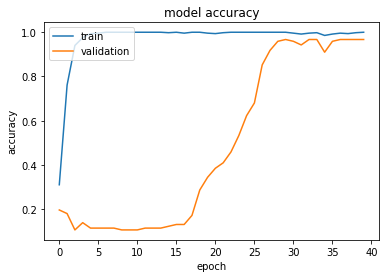

Found 486 validated image filenames belonging to 10 classes.
Found 122 validated image filenames belonging to 10 classes.
Epoch 1/40
16/16 [==============================] - ETA: 0s - loss: 3.7237 - accuracy: 0.2860
Epoch 00001: val_accuracy improved from -inf to 0.21311, saving model to saved_models(20epoch)ITA\model_HOG2.h5
16/16 [==============================] - 3s 163ms/step - loss: 3.7237 - accuracy: 0.2860 - val_loss: 2.1444 - val_accuracy: 0.2131
Epoch 2/40
16/16 [==============================] - ETA: 0s - loss: 0.8042 - accuracy: 0.7737
Epoch 00002: val_accuracy improved from 0.21311 to 0.24590, saving model to saved_models(20epoch)ITA\model_HOG2.h5
16/16 [==============================] - 2s 154ms/step - loss: 0.8042 - accuracy: 0.7737 - val_loss: 2.1247 - val_accuracy: 0.2459
Epoch 3/40
16/16 [==============================] - ETA: 0s - loss: 0.3620 - accuracy: 0.9486
Epoch 00003: val_accuracy did not improve from 0.24590
16/16 [==============================] - 2s 145ms/st

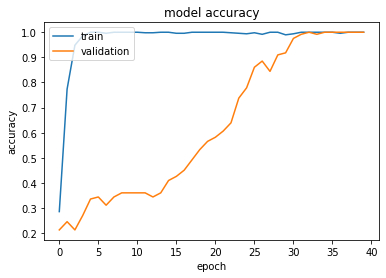

Found 486 validated image filenames belonging to 10 classes.
Found 122 validated image filenames belonging to 10 classes.
Epoch 1/40
16/16 [==============================] - ETA: 0s - loss: 4.3252 - accuracy: 0.2613
Epoch 00001: val_accuracy improved from -inf to 0.22131, saving model to saved_models(20epoch)ITA\model_HOG3.h5
16/16 [==============================] - 3s 167ms/step - loss: 4.3252 - accuracy: 0.2613 - val_loss: 2.3054 - val_accuracy: 0.2213
Epoch 2/40
16/16 [==============================] - ETA: 0s - loss: 0.9941 - accuracy: 0.7263
Epoch 00002: val_accuracy improved from 0.22131 to 0.29508, saving model to saved_models(20epoch)ITA\model_HOG3.h5
16/16 [==============================] - 2s 153ms/step - loss: 0.9941 - accuracy: 0.7263 - val_loss: 2.1378 - val_accuracy: 0.2951
Epoch 3/40
16/16 [==============================] - ETA: 0s - loss: 0.4312 - accuracy: 0.9383
Epoch 00003: val_accuracy improved from 0.29508 to 0.31967, saving model to saved_models(20epoch)ITA\model_

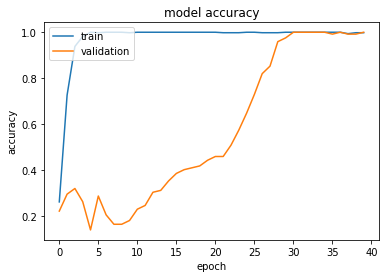

Found 487 validated image filenames belonging to 10 classes.
Found 121 validated image filenames belonging to 10 classes.
Epoch 1/40
16/16 [==============================] - ETA: 0s - loss: 3.3993 - accuracy: 0.3573
Epoch 00001: val_accuracy improved from -inf to 0.21488, saving model to saved_models(20epoch)ITA\model_HOG4.h5
16/16 [==============================] - 3s 177ms/step - loss: 3.3993 - accuracy: 0.3573 - val_loss: 2.1724 - val_accuracy: 0.2149
Epoch 2/40
16/16 [==============================] - ETA: 0s - loss: 0.7019 - accuracy: 0.8193
Epoch 00002: val_accuracy improved from 0.21488 to 0.25620, saving model to saved_models(20epoch)ITA\model_HOG4.h5
16/16 [==============================] - 3s 165ms/step - loss: 0.7019 - accuracy: 0.8193 - val_loss: 2.1119 - val_accuracy: 0.2562
Epoch 3/40
16/16 [==============================] - ETA: 0s - loss: 0.2735 - accuracy: 0.9692
Epoch 00003: val_accuracy improved from 0.25620 to 0.28099, saving model to saved_models(20epoch)ITA\model_

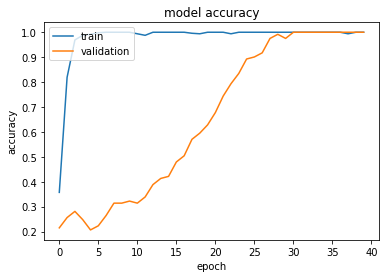

Found 487 validated image filenames belonging to 10 classes.
Found 121 validated image filenames belonging to 10 classes.
Epoch 1/40
16/16 [==============================] - ETA: 0s - loss: 4.3520 - accuracy: 0.3285
Epoch 00001: val_accuracy improved from -inf to 0.28099, saving model to saved_models(20epoch)ITA\model_HOG5.h5
16/16 [==============================] - 3s 178ms/step - loss: 4.3520 - accuracy: 0.3285 - val_loss: 2.2215 - val_accuracy: 0.2810
Epoch 2/40
16/16 [==============================] - ETA: 0s - loss: 0.9931 - accuracy: 0.7433
Epoch 00002: val_accuracy improved from 0.28099 to 0.43802, saving model to saved_models(20epoch)ITA\model_HOG5.h5
16/16 [==============================] - 3s 160ms/step - loss: 0.9931 - accuracy: 0.7433 - val_loss: 2.0876 - val_accuracy: 0.4380
Epoch 3/40
16/16 [==============================] - ETA: 0s - loss: 0.4026 - accuracy: 0.9179
Epoch 00003: val_accuracy did not improve from 0.43802
16/16 [==============================] - 2s 151ms/st

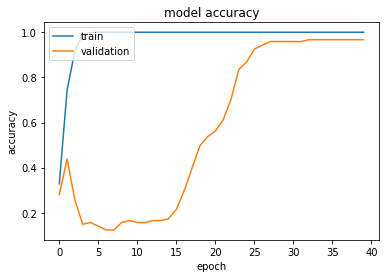

In [74]:
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

save_dir = 'saved_models(20epoch)ITA/'
fold_var = 1

for train_index, val_index in skf.split(np.zeros(608),Y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]

    train_data_generator = idg.flow_from_dataframe(training_data, directory = '../DatasetITAHog/Train',
                               x_col = "filename", y_col = "label",
                               class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)
    valid_data_generator  = idg.flow_from_dataframe(validation_data, directory =  '../DatasetITAHog/Train',
                            x_col = "filename", y_col = "label",
                            class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)

    # CREATE NEW MODEL
    model = create_new_model()
    # COMPILE NEW MODEL
    model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

    # CREATE CALLBACKS
    checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var),
                            monitor='val_accuracy', verbose=1,
                            save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
    # FIT THE MODEL
    h = model.fit(train_data_generator,
                epochs=40,
                callbacks=callbacks_list,
                validation_data=valid_data_generator)
    #PLOT HISTORY
    #:
    #:

    # LOAD BEST MODEL to evaluate the performance of the model
    model.load_weights("saved_models(20epoch)ITA/model_HOG"+str(fold_var)+".h5")
    

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names,results))

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_LOSS.append(results['loss'])

    plt.plot(h.history['accuracy']) #validation
    plt.plot(h.history['val_accuracy']) #train
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    tf.keras.backend.clear_session()

    fold_var += 1

In [75]:
VALIDATION_ACCURACY

[0.9672130942344666, 1.0, 1.0, 1.0, 0.9669421315193176]

In [76]:
VALIDATION_LOSS

[0.47612568736076355,
 0.29307737946510315,
 0.3662301301956177,
 0.264868825674057,
 0.21877239644527435]